In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\HP Probook'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# read data set to python

In [5]:
hypo=pd.read_csv(r"dataset w7 (1).csv")


In [7]:
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


# gender wise descriptive analysis on test score 

In [9]:
hypo.groupby("Gender")["Total Marks"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
female,16.0,33.750000,12.865976,12.0,25.50,39.0,43.50,50.0
male,12.0,30.416667,12.168950,14.0,21.75,29.0,43.25,47.0


In [10]:
hypo.groupby("Gender").agg({"Total Marks":["min","max","mean","median","std"]})

Total Marks                                 
               min max       mean median        std
Gender                                             
female          12  50  33.750000   39.0  12.865976
male            14  47  30.416667   29.0  12.168950

In [11]:
hypo.groupby("Test preparation").agg({"Total Marks":["min","max","mean","median","std"]})

Total Marks                                 
                         min max       mean median        std
Test preparation                                             
completed                 40  50  44.571429   44.0   3.359422
none                      12  48  28.238095   27.0  11.661495

# here we are checking whether the test scores of male and female are equal


# therefore we consider the null hypothesis as Test scores of males and Females are not same 


In [13]:
#Alternate hypothesis is Test Scores of M & F are same 

In [14]:
data_m_score = hypo[hypo['Gender']=='male']
data_f_score = hypo[hypo['Gender']=='female']

In [15]:
#Check assumption in T test - normal distibution and equal variance 

In [16]:
#Checking whether the distribution is normal 

In [17]:
stats.shapiro(data_m_score['Total Marks'])

ShapiroResult(statistic=0.9093747138977051, pvalue=0.20944461226463318)

In [18]:
#here, p values > 0.05 alpha value , therefore it is a normal distribution

In [19]:
#Checking for equal variance

In [20]:
stats.levene(data_m_score['Total Marks'], data_f_score['Total Marks'],center="mean")

LeveneResult(statistic=0.20673734725307086, pvalue=0.653110396551517)

In [21]:
#from both above cases , p values> 0.05 alpha value , hence the equal variance assumption is valid 

In [22]:
stats.ttest_ind(data_m_score['Total Marks'], data_f_score['Total Marks'],equal_var=True)

Ttest_indResult(statistic=-0.6940885268848668, pvalue=0.4937822317960763)

In [23]:
#Since the p value is 0.49 and greater than 0.05 aplha value , we cannot reject the null hypothesis 
# Hence the scores scored by female and males are different and not same 

Text(0.5, 1.0, 'Boxplot of Gender vs Total Marks')

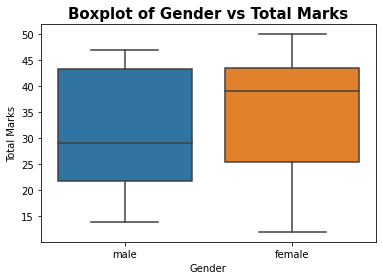

In [27]:
sns.boxplot(x="Gender",y="Total Marks",data = hypo)
plt.title("Boxplot of Gender vs Total Marks",fontsize=15,fontweight="bold")

In [28]:
#by refering the graph we can see that the score of mae anf females are different which supports the hypothesis findings

In [29]:
#We need to check whether the test preparation helps student
#So we consider the null hypothesis as test preparation doesnt help students
#Alternate hypothesis is test preparation helps student

In [30]:
data_n_prep = hypo[hypo['Test preparation']=='none']
data_c_prep = hypo[hypo['Test preparation']=='completed']

In [31]:
#Check assumption in T test - normal distibution and equal variance 

In [32]:
#Checking whether the distribution is normal 

In [33]:
stats.shapiro(data_n_prep["Total Marks"])

ShapiroResult(statistic=0.935218095779419, pvalue=0.17507188022136688)

In [34]:
stats.shapiro(data_c_prep["Total Marks"])

ShapiroResult(statistic=0.9187047481536865, pvalue=0.4593968093395233)

In [35]:
# In both cases , p value is more than 0.05 , hence distribution is normal 

In [36]:
stats.levene(data_n_prep["Total Marks"],data_c_prep["Total Marks"],center="mean")

LeveneResult(statistic=8.022056069444217, pvalue=0.008806800984690211)

In [37]:
#Here the p value is less than alpha value of 0.05 , hence the variance is not equal 
#So we need to use welch t test for unequal variance

In [38]:
stats.ttest_ind(data_n_prep['Total Marks'], data_c_prep['Total Marks'],equal_var=False)

Ttest_indResult(statistic=-5.743210589066012, pvalue=4.884790752092096e-06)

In [39]:
#Here the p value is less than 0.05, hence we can reject the null hypothesis and confirm test prep helps the students

Text(0.5, 1.0, 'Boxplot of Test Preparation vs Total Marks')

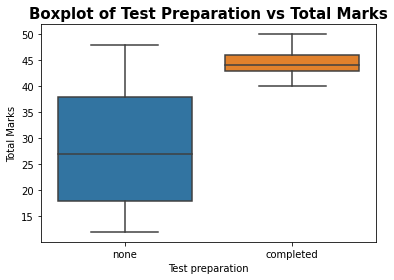

In [40]:
sns.boxplot(x="Test preparation",y="Total Marks",data = hypo)
plt.title("Boxplot of Test Preparation vs Total Marks",fontsize=15,fontweight="bold")

In [41]:
#From the boxplot we can see that students with test preparation have scored much higher marks than those not completed 
#This graph supports the alternate hypothesis claim